# 前準備

In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pyaudio

print("default device info:", pa.get_default_output_device_info())
print("** output device list **")
for index in range(0, pa.get_device_count()):
    info = pa. get_device_info_by_index(index)
    print(info["index"], info["name"])

freq =  440 # midA(「ラ」の音程)
sampling_rate = 48000 # 48kHz
time = 1 # 1秒
device_index=3

default device info: {'index': 1, 'structVersion': 2, 'name': 'MacBook Proのスピーカー', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.01, 'defaultLowOutputLatency': 0.012154195011337868, 'defaultHighInputLatency': 0.1, 'defaultHighOutputLatency': 0.022312925170068026, 'defaultSampleRate': 44100.0}
** output device list **
0 MacBook Proのマイク
1 MacBook Proのスピーカー
2 Microsoft Teams Audio
3 ZoomAudioDevice


# ラ(440Hz)を鳴らす

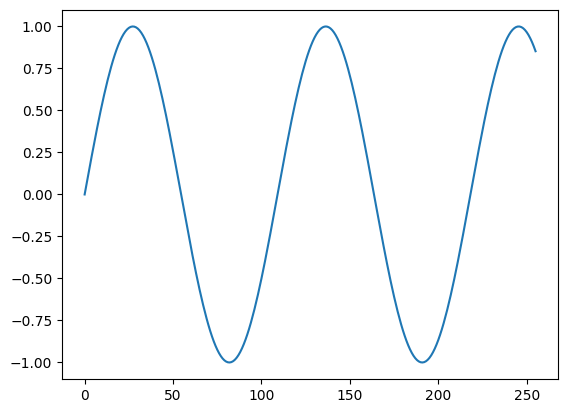

In [77]:
sin_wave = np.sin(np.arange(int(time * sampling_rate)) * 2 * np.pi  * freq / sampling_rate)

# 波形を描画する
# 48000サンプルの全要素で描画してもよくわからないので256サンプルで描画する
plt.plot(sin_wave[:256])

# 鳴らす
pa = pyaudio.PyAudio()
stream = pa.open(format=pyaudio.paFloat32, channels=1, rate=sampling_rate, frames_per_buffer=1024, output=True, output_device_index=device_index)
stream.write(sin_wave.astype(np.float32).tobytes())
stream.close()
pa.terminate()


# 連続した音(ドミソ)を鳴らす

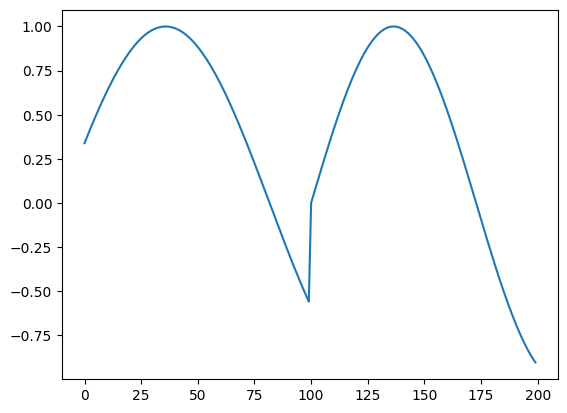

In [93]:
freq_c = 261.6
freq_e = 329.6
freq_g = 392.0
sin_wave_c = np.sin(np.arange(int(time * sampling_rate)) * 2 * np.pi  * freq_c / sampling_rate)
sin_wave_e = np.sin(np.arange(int(time * sampling_rate)) * 2 * np.pi  * freq_e / sampling_rate)
sin_wave_g = np.sin(np.arange(int(time * sampling_rate)) * 2 * np.pi  * freq_g / sampling_rate)

joined = np.array([])
joined = np.append(joined, sin_wave_c)
joined = np.append(joined, sin_wave_e)
joined = np.append(joined, sin_wave_g)

# 波形の変わり目(C->E)を描画する
plt.plot(joined[47900:48100])

# 鳴らす
pa = pyaudio.PyAudio()
stream = pa.open(format=pyaudio.paFloat32, channels=1, rate=sampling_rate, frames_per_buffer=1024, output=True, output_device_index=device_index)
stream.write(joined.astype(np.float32).tobytes())
stream.close()
pa.terminate()

# 重なった音(ドミソ)を鳴らす

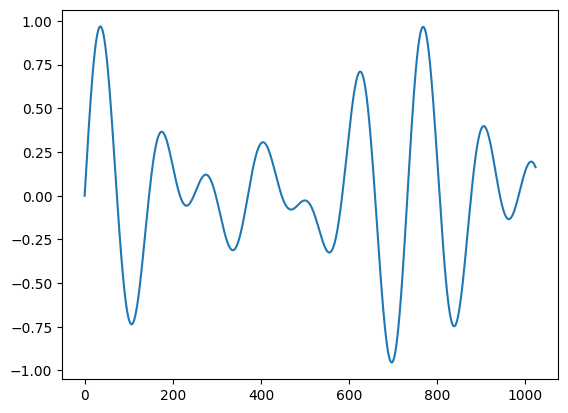

In [95]:
freq_c = 261.6
freq_e = 329.6
freq_g = 392.0
sin_wave_c = np.sin(np.arange(int(time * sampling_rate)) * 2 * np.pi  * freq_c / sampling_rate)
sin_wave_e = np.sin(np.arange(int(time * sampling_rate)) * 2 * np.pi  * freq_e / sampling_rate)
sin_wave_g = np.sin(np.arange(int(time * sampling_rate)) * 2 * np.pi  * freq_g / sampling_rate)

waves = np.vstack([sin_wave_c, sin_wave_e, sin_wave_g])
mixed = waves.mean(axis=0)

# 合成された波形を描画する
plt.plot(mixed[:1024])

# 鳴らす
pa = pyaudio.PyAudio()
stream = pa.open(format=pyaudio.paFloat32, channels=1, rate=sampling_rate, frames_per_buffer=1024, output=True, output_device_index=device_index)
stream.write(mixed.astype(np.float32).tobytes())
stream.close()
pa.terminate()